**1. Indexing problem of our function**

Our initial function is

$$
\begin{split}
f_{original}(j,k,l) &= \cos{(2 \pi \frac{jk}{N})} \cdot \sin{(2 \pi \frac{jl}{N})} \cdot e^{-\frac{j}{N}} \\ &+ \sin{(2 \pi \frac{jk}{N})} \cdot \cos(2 \pi \frac{jl}{N}) \cdot e^{-\frac{j^2}{N^2}}
\end{split}
$$


$x = j/N$ \
$y = k/N$ \
$\cos(2\pi \cdot jk/N) = \cos(2\pi \cdot (Nx)(Ny)/N) = \cos(2\pi Nxy)$


When N is increasing, The period of funciton is highly oscillating!
Changing N, The function is also changed by N.

So, I suggest the following modified function :


$$
\begin{split}
f_{new}(j,k,l) &= \cos{(2 \pi \frac{jk}{N^2})} \cdot \sin{(2 \pi \frac{jl}{N^2})} \cdot e^{-\frac{j}{N}} \\ &+ \sin{(2 \pi \frac{jk}{N^2})} \cdot \cos(2 \pi \frac{jl}{N^2}) \cdot e^{-\frac{j^2}{N^2}}
\end{split}
$$

┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


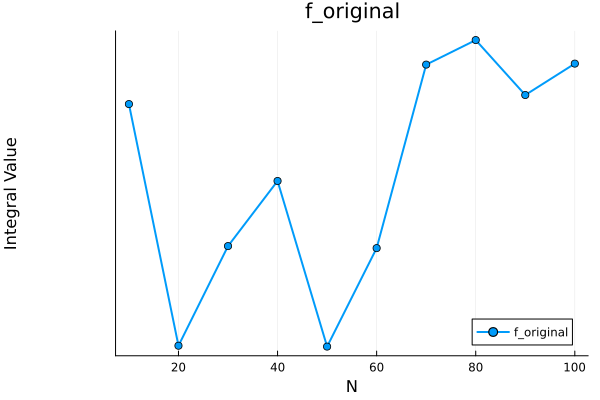

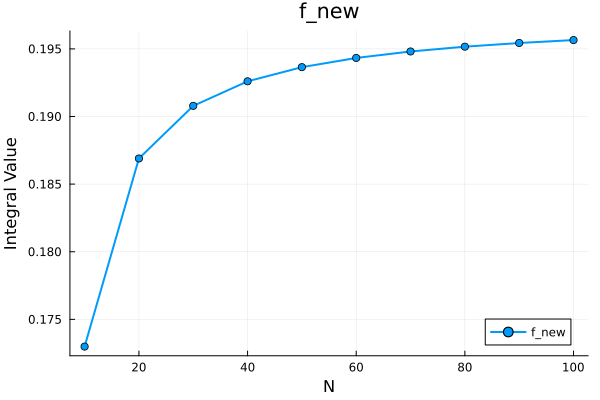

Approximated Integral Value : 0.1956521400764422

┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ubuntu/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [21]:
using Plots

function f_original(v, N)
    j = Float64(v[1])
    k = Float64(v[2])
    l = Float64(v[3])
    
    NSq = N^2

    term1 = cos(2*π*(j*k/N)) * sin(2*π*(j*l/N)) * exp(-j/N)
    term2 = sin(2*π*(j*k/N)) * cos(2*π*(j*l/N)) * exp(-j^2/NSq)
    
    return term1 + term2
end

function f_new(v, N)
    j = Float64(v[1])
    k = Float64(v[2])
    l = Float64(v[3])

    NSq = N^2
    
    term1 = cos(2*π*(j*k/NSq)) * sin(2*π*(j*l/NSq)) * exp(-j/N)
    term2 = sin(2*π*(j*k/NSq)) * cos(2*π*(j*l/NSq)) * exp(-j^2/NSq)
    
    return term1 + term2
end


function calculate_integral(f,N)
    sum = 0
    
    for j in 1:N
        for k in 1:N
            for l in 1:N 
                sum += f([j, k, l], N)
            end
        end
    end

    return sum / (N^3)
end


lstN = [10,20,30,40,50,60,70,80,90,100]
lstOriginal = [] 
lstNew = []

for N in lstN

    valOriginal = calculate_integral(f_original, N)
    push!(lstOriginal, valOriginal) #same with 'append' in python

    valNew = calculate_integral(f_new, N)
    push!(lstNew,valNew)
end

p1 = plot(
    lstN, 
    lstOriginal,
    title = "f_original",
    xlabel = "N",
    ylabel = "Integral Value",
    label = "f_original",
    marker = :circle,
    linewidth = 2
)

display(p1) 

p2 = plot(
    lstN, 
    lstNew,
    title = "f_new",
    xlabel = "N",
    ylabel = "Integral Value",
    label = "f_new",
    marker = :circle,
    linewidth = 2
)


display(p2)

println("Approximated Integral Value : ", lstNew[10])


**2. Truncated pdf problem**

In previous task, important sampling was conducted using a normal distribution with mean of 0 and variance of 0.5.
I use the standard normal distribution to calculate the probability of truncated region.

$Z=\frac{X-\mu }{\sigma }$

$\mu = 0, \sigma = 0.5, Z = 2$ \
P = 0.9772($\sigma$<2.0) - 0.0277(-2.0<$\sigma$) = 0.9545, For 3 dim, P = (0.9545)^3


In [25]:
using Distributions 

function f(v)
    j = v[1]
    k = v[2]
    l = v[3]

    #NSq = N^2
    
    #term1 = cos(2*π*(j*k/NSq)) * sin(2*π*(j*l/NSq)) * exp(-j/N)
    #term2 = sin(2*π*(j*k/NSq)) * cos(2*π*(j*l/NSq)) * exp(-j^2/NSq)

    term1 = cos(2*π*(j*k)) * sin(2*π*(j*l)) * exp(-j)
    term2 = sin(2*π*(j*k)) * cos(2*π*(j*l)) * exp(-j^2)


    return term1 + term2
end



dist = Truncated(Normal(0.0, 1), 0.0, 1.0)
distNormal = Normal(0.0, 0.5)

println(pdf(dist, 0.0))
println(pdf(distNormal, 0.0))

dist3D = Product([dist, Uniform(0,1), Uniform(0,1)])

M = 20
N = 1_000_000

mcAcc = 0
mcAccSq = 0
isAcc = 0
isAccSq = 0

for i in 1:M
    mcSum = 0
    isSum = 0

    for _ in 1:N
        isRandPoint = rand(dist3D)
        mcRandPoint = (rand(), rand(), rand())

        fv= f(isRandPoint)
        #pv = 1/(1*1*1)
        qv = pdf(dist3D, isRandPoint)
        #println("qv = $qv, f(v) =  $fv, isRandPoint = $isRandPoint")

        isSum += fv / qv
        mcSum += f(mcRandPoint)
        #println("mcSum : $mcSum")
    end

    mcSum = mcSum / N
    #println("Step $i : mcSum = $mcSum")
    mcAcc += mcSum
    mcAccSq += mcSum^2

    isSum = isSum / N
    isAcc += isSum
    isAccSq += isSum^2
end

mcAccAv = mcAcc / M
isAccAv = isAcc / M

mcStdev = sqrt((mcAccSq / M - mcAccAv^2)/M)
isStdev = sqrt((isAccSq / M - isAccAv^2)/M)

println("MeanValue of Simple MC : $mcAccAv")
println("MeanValue of MC with Importance Sampling : $isAccAv")

println("==")


println("Standard deviation of Simple MC, $mcStdev")
println("Standard deviation of MC with Importance Sampling, $isStdev")

1.1687371345136335
0.7978845608028654
MeanValue of Simple MC : 0.19757559385887027
MeanValue of MC with Importance Sampling : 0.1974496972056636
==
Standard deviation of Simple MC, 8.176786823015485e-5
Standard deviation of MC with Importance Sampling, 7.342663364919873e-5


**+)Time macro** \
https://docs.julialang.org/en/v1/manual/performance-tips/#Measure-performance-with-[@time](@ref)-and-pay-attention-to-memory-allocation

<img src="Image/timeMacro.png" alt="std" width=800>

**3. MC-TCI**

In [ ]:
import TensorCrossInterpolation as TCI

function f(v)
    j = v[1]
    k = v[2]
    l = v[3]
    
    NSq = N^2
    
    term1 = cos(2*π*(j*k/NSq)) * sin(2*π*(j*l/NSq)) * exp(-j/N)
    term2 = sin(2*π*(j*k/NSq)) * cos(2*π*(j*l/NSq)) * exp(-j^2/NSq)

    return term1 + term2
end


function exact_sum()
    sum = 0.0
    
    for j in 1:N
        for k in 1:N
            for l in 1:N
                sum += f([j, k, l])
            end
        end
    end
    return sum / N^3
end


function mc_tci_sum(M)

    tciSumLst = zeros(M)
    localdims = fill(N, 2)

    for i in 1:M
        j = rand(1:N)
        g(v) = f([j, v[1], v[2]]) #the method of fix one variable
        
        tci_2d, _, _ = TCI.crossinterpolate2(Float64, g, localdims; tolerance = 1e-8 )
        
        mps = tci_2d.sitetensors
        
        sumK = dropdims(sum(mps[1],dims=2),dims=2) #(r1 X N X r2) -> (r1 X 1 X r2) -> (r1 x r2)
        sumL = dropdims(sum(mps[2],dims=2),dims=2)

        resultMatrix = sumK * sumL #1x1 matrix
        
        tciSumLst[i] = resultMatrix[1] / N^2
    end
    
    return sum(tciSumLst) / length(tciSumLst)
end

N = 20

# conduct exact sum
exactSum = exact_sum()
println("exact sum = $exactSum")

MLst = [100, 1_000, 10_000]

for M in MLst
    X = 10
    acc = 0
    accSq = 0

    for _ in 1:X
        mctciSum = mc_tci_sum(M)

        acc += mctciSum
        accSq += mctciSum^2
    end

    stdev = sqrt((accSq / X - (acc / X)^2)/X)

    println("\nnumber of j : $M")
    println("MC-TCI stdev : $stdev" )
    println("MC-TCI result : ", acc/X)
end

exact sum = 0.18689630762777193

number of j : 100
MC-TCI stdev : 0.0055354917273076
MC-TCI result : 0.20162256356236602

number of j : 1000
MC-TCI stdev : 0.0029501410221333666
MC-TCI result : 0.18727147489058352

number of j : 10000
MC-TCI stdev : 0.0010157338705895197
MC-TCI result : 0.1859931951103771
